In [ ]:
from google.colab import drive
drivepath = "/content/drive"
drive.mount(drivepath, force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
# Read the CSV file into a DataFrame

filepath= "/content/drive/MyDrive/Games.csv"
df= pd.read_csv(filepath, encoding='latin-1')
print(df)

                                    Game    Year             Genre  \
0                     Grand Theft Auto V  2014.0            Action   
1              Call of Duty: Black Ops 3  2015.0           Shooter   
2                  Red Dead Redemption 2  2018.0  Action-Adventure   
3                     Call of Duty: WWII  2017.0           Shooter   
4                                FIFA 18  2017.0            Sports   
...                                  ...     ...               ...   
1029  Fallen Legion: Flames of Rebellion     NaN      Role-Playing   
1030            Radial G Racing Revolved  2017.0            Racing   
1031                The Mummy Demastered     NaN            Action   
1032          Project Nimbus: Code Mirai     NaN            Action   
1033                 Battle Chef Brigade     NaN            Action   

           Publisher  North America  Europe  Japan  Rest of World  Global  
0     Rockstar Games           6.06    9.71   0.60           3.02   19.39  
1      

In [ ]:
# Get some basic information about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB
None


In [ ]:
# Get descriptive statistics for numerical columns
print(df.describe())

              Year  North America       Europe        Japan  Rest of World  \
count   825.000000    1034.000000  1034.000000  1034.000000    1034.000000   
mean   2015.966061       0.204613     0.248714     0.033636       0.089014   
std       1.298360       0.563471     0.785491     0.108344       0.249410   
min    2013.000000       0.000000     0.000000     0.000000       0.000000   
25%    2015.000000       0.000000     0.000000     0.000000       0.000000   
50%    2016.000000       0.020000     0.000000     0.000000       0.010000   
75%    2017.000000       0.120000     0.130000     0.030000       0.050000   
max    2020.000000       6.180000     9.710000     2.170000       3.020000   

            Global  
count  1034.000000  
mean      0.576054  
std       1.583534  
min       0.000000  
25%       0.000000  
50%       0.060000  
75%       0.357500  
max      19.390000  


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing Values:")
print(missing_values)

Missing Values:
Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64


In [ ]:
# Handle missing values (replace NaN in 'Year' with the mean)
df['Year'].fillna(df['Year'].mean(), inplace=True)
print(df)

                                    Game         Year             Genre  \
0                     Grand Theft Auto V  2014.000000            Action   
1              Call of Duty: Black Ops 3  2015.000000           Shooter   
2                  Red Dead Redemption 2  2018.000000  Action-Adventure   
3                     Call of Duty: WWII  2017.000000           Shooter   
4                                FIFA 18  2017.000000            Sports   
...                                  ...          ...               ...   
1029  Fallen Legion: Flames of Rebellion  2015.966061      Role-Playing   
1030            Radial G Racing Revolved  2017.000000            Racing   
1031                The Mummy Demastered  2015.966061            Action   
1032          Project Nimbus: Code Mirai  2015.966061            Action   
1033                 Battle Chef Brigade  2015.966061            Action   

           Publisher  North America  Europe  Japan  Rest of World  Global  
0     Rockstar Games   

In [ ]:
# Drop rows with NaN values in the 'Publisher' column
df = df.dropna(subset=['Publisher'])

In [ ]:
print(df.isnull().sum())

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64


In [ ]:
# Convert the 'year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')

# Extract only the year from the datetime column
df['Year'] = df['Year'].dt.year

# Print the DataFrame to see the changes
print(df)

                           Game  Year             Genre  \
0            Grand Theft Auto V  2014            Action   
1     Call of Duty: Black Ops 3  2015           Shooter   
2         Red Dead Redemption 2  2018  Action-Adventure   
3            Call of Duty: WWII  2017           Shooter   
4                       FIFA 18  2017            Sports   
...                         ...   ...               ...   
1025                  Biomutant  2019            Action   
1026                    de Blob  2017          Platform   
1027           Chaos on Deponia  2017         Adventure   
1028                  Code Vein  2018            Action   
1030   Radial G Racing Revolved  2017            Racing   

                       Publisher  North America  Europe  Japan  Rest of World  \
0                 Rockstar Games           6.06    9.71   0.60           3.02   
1                     Activision           6.18    6.05   0.41           2.44   
2                 Rockstar Games           5.26 

<ipython-input-9-2fab6366a01d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
<ipython-input-9-2fab6366a01d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].dt.year


In [ ]:
# Top 5 games by global sales
top_5_games = df.nlargest(5, "Global")
print(top_5_games)

                        Game  Year             Genre       Publisher  \
0         Grand Theft Auto V  2014            Action  Rockstar Games   
1  Call of Duty: Black Ops 3  2015           Shooter      Activision   
2      Red Dead Redemption 2  2018  Action-Adventure  Rockstar Games   
3         Call of Duty: WWII  2017           Shooter      Activision   
4                    FIFA 18  2017            Sports       EA Sports   

   North America  Europe  Japan  Rest of World  Global  
0           6.06    9.71   0.60           3.02   19.39  
1           6.18    6.05   0.41           2.44   15.09  
2           5.26    6.21   0.21           2.26   13.94  
3           4.67    6.21   0.40           2.12   13.40  
4           1.27    8.64   0.15           1.73   11.80  


In [ ]:
le = LabelEncoder();
df['Game'] = le.fit_transform(df['Game'])
df['Genre'] = le.fit_transform(df['Genre'])
df['Publisher'] = le.fit_transform(df['Publisher'])
print(df)

      Game  Year  Genre  Publisher  North America  Europe  Japan  \
0      283  2014      0        109           6.06    9.71   0.60   
1      103  2015     12          8           6.18    6.05   0.41   
2      534  2018      1        109           5.26    6.21   0.21   
3      107  2017     12          8           4.67    6.21   0.40   
4      229  2017     14         41           1.27    8.64   0.15   
...    ...   ...    ...        ...            ...     ...    ...   
1025    76  2019      0        123           0.00    0.00   0.00   
1026   820  2017      8        123           0.00    0.00   0.00   
1027   112  2017      2         35           0.00    0.00   0.00   
1028   119  2018      0         17           0.00    0.00   0.00   
1030   524  2017     10        126           0.00    0.00   0.00   

      Rest of World  Global  
0              3.02   19.39  
1              2.44   15.09  
2              2.26   13.94  
3              2.12   13.40  
4              1.73   11.80  
...

<ipython-input-11-46ed199f1850>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Game'] = le.fit_transform(df['Game'])
<ipython-input-11-46ed199f1850>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = le.fit_transform(df['Genre'])
<ipython-input-11-46ed199f1850>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

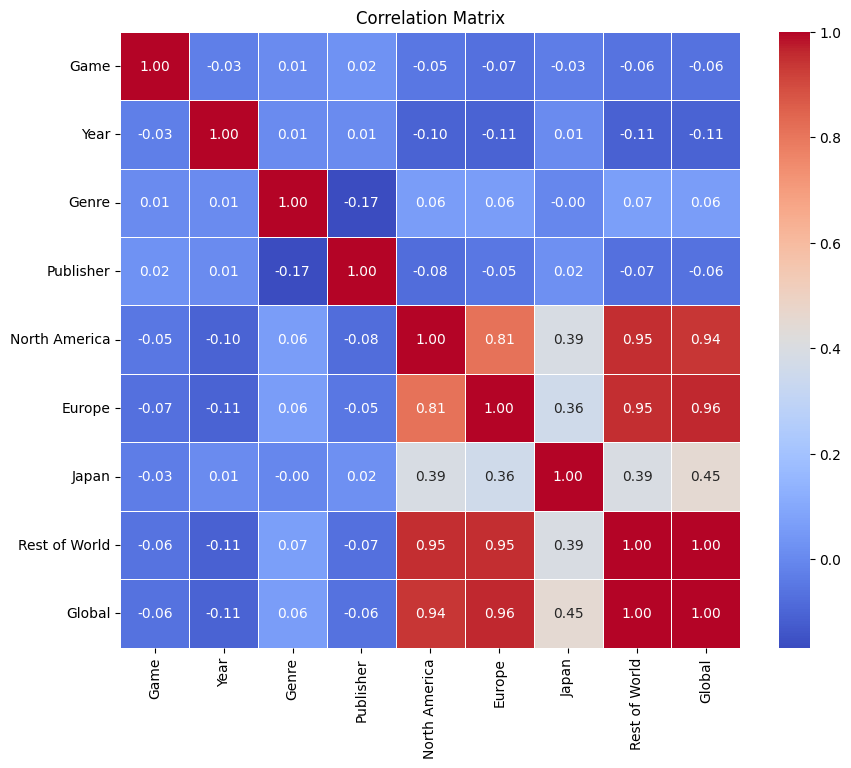

In [ ]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
target='Global'
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
min_sell = df[target].min()
min_sell_count = df[df[target] == min_sell].shape[0]
print(f"The minimum sell is {min_sell} and it belongs to {min_sell_count} games.")

The minimum sell is 0.0 and it belongs to 116 games.


In [ ]:
model = LinearRegression();

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
model.predict(X_test)

array([ 2.14965108e-02,  7.40007669e-01,  2.37981691e+00,  7.73455275e-01,
        3.07449838e-01,  1.98215034e-01,  1.28702874e-04,  1.89919386e+00,
        5.01893397e-02,  1.11804882e-04,  9.89283350e-02,  3.31565170e-01,
        1.19024922e-01,  4.16899205e+00,  1.42081392e-01,  2.00325728e-02,
        3.75933354e+00,  5.50973067e-01,  2.57120528e-04,  1.58838044e-01,
       -4.15639789e-04,  2.77933672e-01, -1.51786440e-04,  4.83244861e-02,
        1.10346968e-01,  1.55797283e-04,  1.10287013e-01,  3.69440789e-01,
        2.28273726e-02,  8.60330491e-01,  2.19078042e-01,  2.23818376e-01,
        9.05233886e-02,  1.05053531e+00,  3.78069238e-01,  4.96554638e-02,
        2.40709466e+00,  2.48775845e+00,  1.13698496e-02,  1.03934270e+00,
        4.82011981e+00,  1.39878580e+00,  5.49584990e-01,  1.97838766e-04,
        2.32294681e-01,  7.01572533e-02,  5.37819594e-05,  8.73096409e-02,
        2.38828179e+00, -5.64555361e-05,  1.99856289e-02,  1.16284586e-02,
        2.02751017e-01,  

In [ ]:
print ('R Squared =', r2_score(y_test, y_pred))
print ('MAE =',mean_absolute_error(y_test, y_pred))
print ('MSE =',mean_squared_error(y_test, y_pred))

R Squared = 0.9999930291017746
MAE = 0.0030808848563888343
MSE = 2.3720568999222308e-05


In [ ]:
# Convert the numerical labels back to the original category names:
df['Publisher'] = le.inverse_transform(df['Publisher'])
df['Genre'] = le.inverse_transform(df['Genre'])
print(df)

      Game  Year                 Genre                   Publisher  \
0      283  2014              2K Games              Rockstar Games   
1      103  2015              Astragon                  Activision   
2      534  2018             2K Sports              Rockstar Games   
3      107  2017              Astragon                  Activision   
4      229  2017                 Atlus                   EA Sports   
...    ...   ...                   ...                         ...   
1025    76  2019              2K Games                  THQ Nordic   
1026   820  2017            Activision                  THQ Nordic   
1027   112  2017             3D Realms      Daedalic Entertainment   
1028   119  2018              2K Games  Bandai Namco Entertainment   
1030   524  2017  Alternative Software               Tammeka Games   

      North America  Europe  Japan  Rest of World  Global  
0              6.06    9.71   0.60           3.02   19.39  
1              6.18    6.05   0.41     

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print ('R Squared =', r2_score(y_test, y_pred))
print ('MAE =',mean_absolute_error(y_test, y_pred))
print ('MSE =',mean_squared_error(y_test, y_pred))

print ('R Squared (Random Forest) =', r2_score(y_test, y_pred_rf))
print ('MAE (Random Forest) =', mean_absolute_error(y_test, y_pred_rf))
print ('MSE (Random Forest) =', mean_squared_error(y_test, y_pred_rf))

R Squared = 0.9999930291017746
MAE = 0.0030808848563888343
MSE = 2.3720568999222308e-05
R Squared (Random Forest) = 0.993684895735566
MAE (Random Forest) = 0.04619696969696968
MSE (Random Forest) = 0.02148903363636358


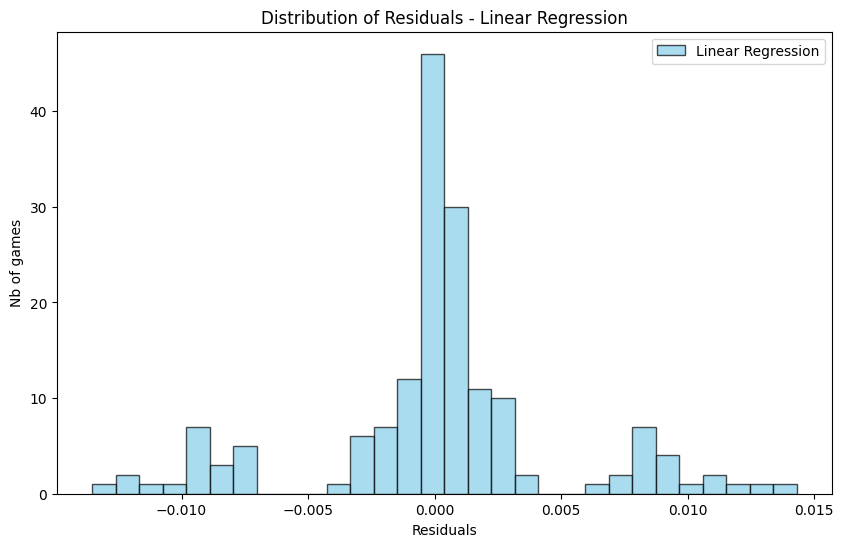

In [ ]:
# Calculate residuals for Linear Regression
residuals_lr = y_test - y_pred

# Calculate residuals for Random Forest
residuals_rf = y_test - y_pred_rf

# Create a histogram for residuals of Linear Regression
plt.figure(figsize=(10, 6))
plt.hist(residuals_lr, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Nb of games')
plt.title('Distribution of Residuals - Linear Regression')
plt.legend()
plt.show()

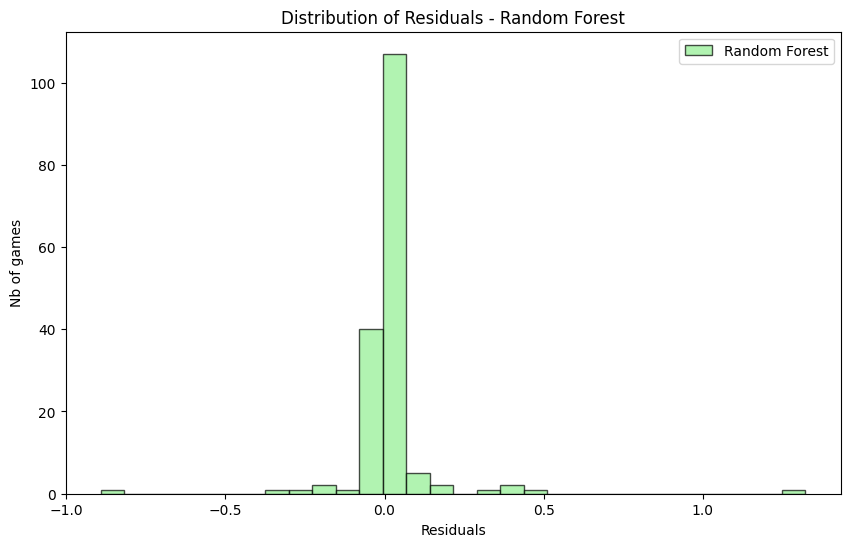

In [ ]:
# Create a histogram for residuals of Random Forest
plt.figure(figsize=(10, 6))
plt.hist(residuals_rf, bins=30, color='lightgreen', edgecolor='black', alpha=0.7, label='Random Forest')
plt.xlabel('Residuals')
plt.ylabel('Nb of games')
plt.title('Distribution of Residuals - Random Forest')
plt.legend()
plt.show()

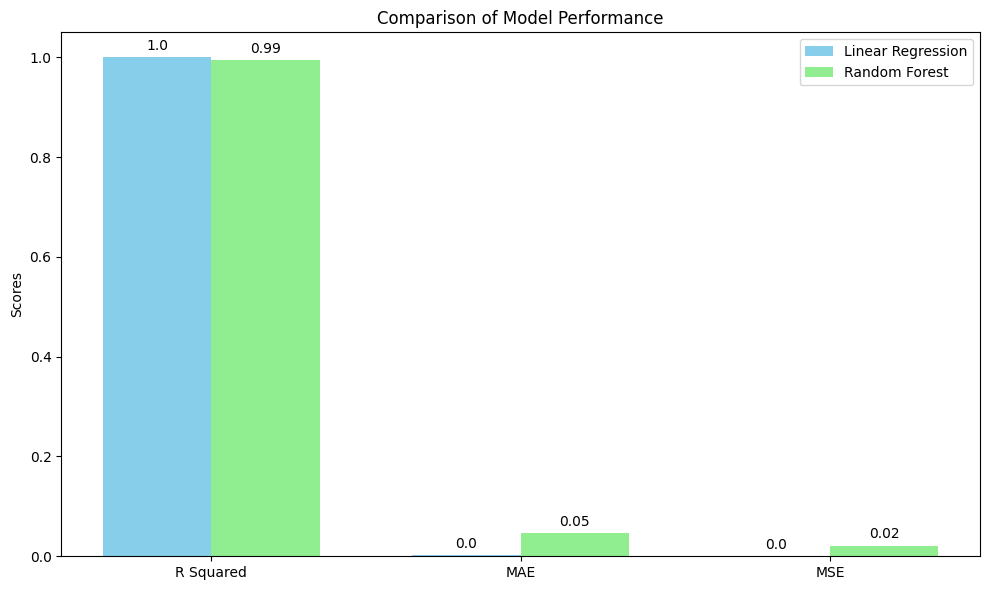

In [ ]:
import numpy as np

# Evaluate Linear Regression model
linear_regression_scores = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)]

# Evaluate Random Forest model
random_forest_scores = [r2_score(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_rf)]

# Create a bar plot
labels = ['R Squared', 'MAE', 'MSE']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, linear_regression_scores, width, label='Linear Regression', color='skyblue')
rects2 = ax.bar(x + width/2, random_forest_scores, width, label='Random Forest', color='lightgreen')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

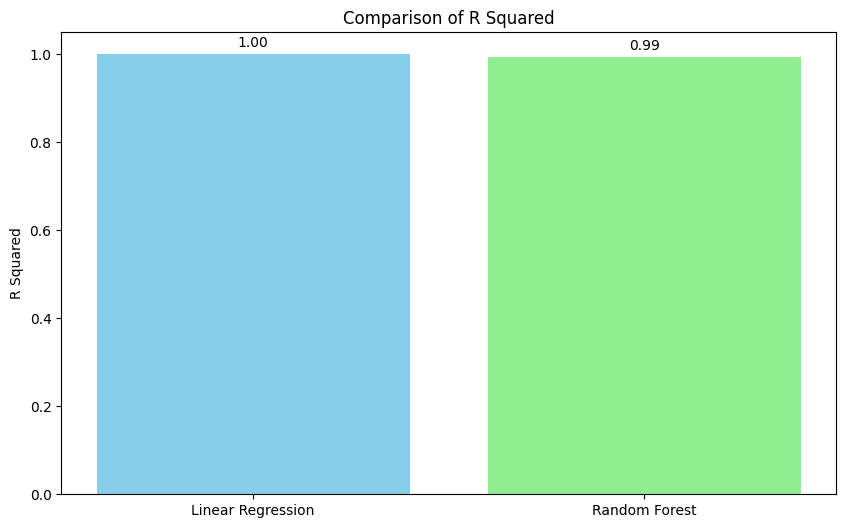

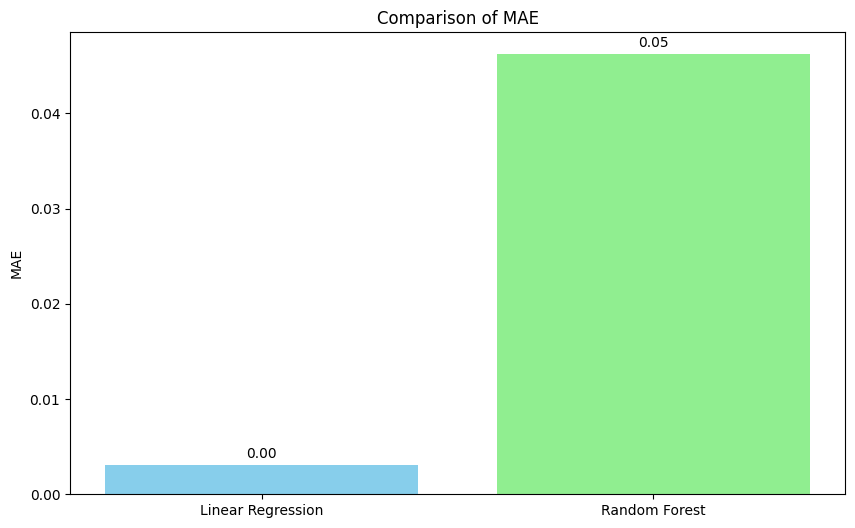

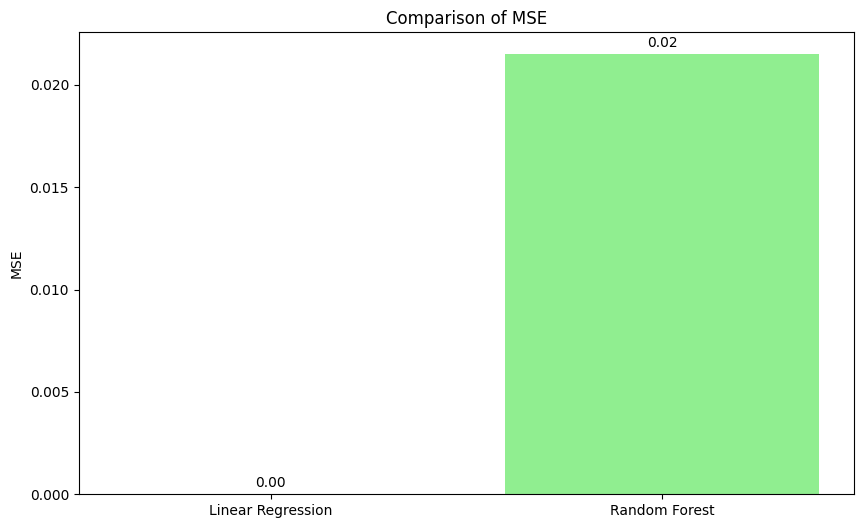

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate Linear Regression model
linear_regression_scores = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)]

# Evaluate Random Forest model
random_forest_scores = [r2_score(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_rf)]

# Create individual bar plots for each metric
metrics = ['R Squared', 'MAE', 'MSE']
linear_regression_scores = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)]
random_forest_scores = [r2_score(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_rf)]

# Plotting function
def plot_metric(metric, lr_score, rf_score, color_lr, color_rf):
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(['Linear Regression', 'Random Forest'], [lr_score, rf_score], color=[color_lr, color_rf])
    ax.set_ylabel(metric)
    ax.set_title(f'Comparison of {metric}')

    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

    plt.show()

# Plot each metric
plot_metric('R Squared', linear_regression_scores[0], random_forest_scores[0], 'skyblue', 'lightgreen')
plot_metric('MAE', linear_regression_scores[1], random_forest_scores[1], 'skyblue', 'lightgreen')
plot_metric('MSE', linear_regression_scores[2], random_forest_scores[2], 'skyblue', 'lightgreen')


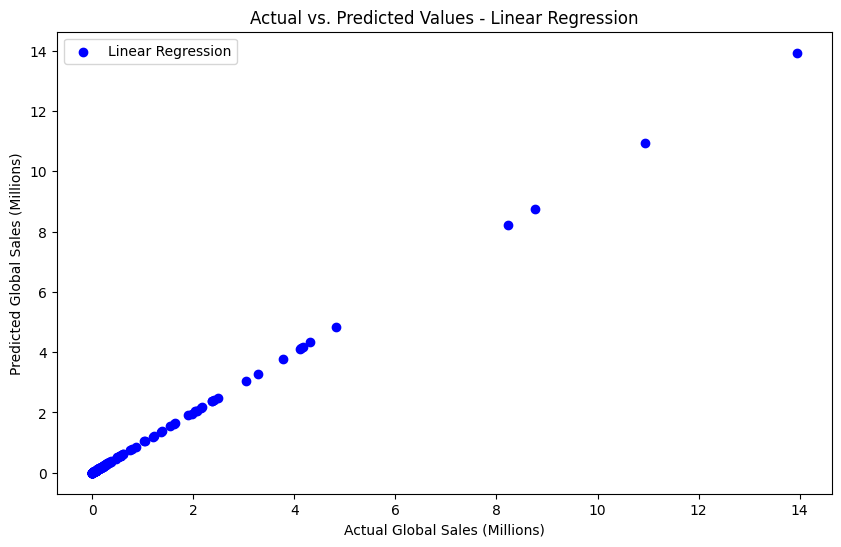

In [ ]:
# Scatter plot of actual vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', label='Linear Regression')
plt.xlabel("Actual Global Sales (Millions)")
plt.ylabel("Predicted Global Sales (Millions)")
plt.title("Actual vs. Predicted Values - Linear Regression")
plt.legend()
plt.show()

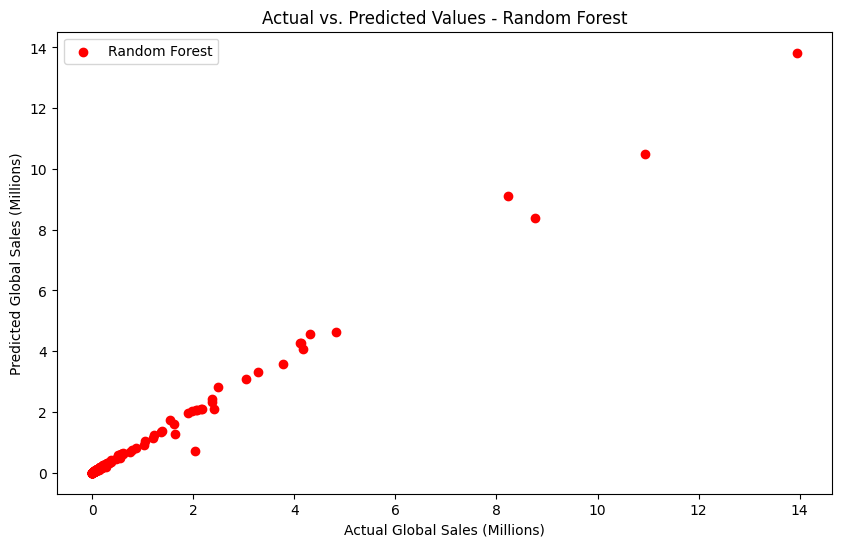

In [ ]:
# Scatter plot of actual vs. predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='r', label='Random Forest')
plt.xlabel("Actual Global Sales (Millions)")
plt.ylabel("Predicted Global Sales (Millions)")
plt.title("Actual vs. Predicted Values - Random Forest")
plt.legend()
plt.show()

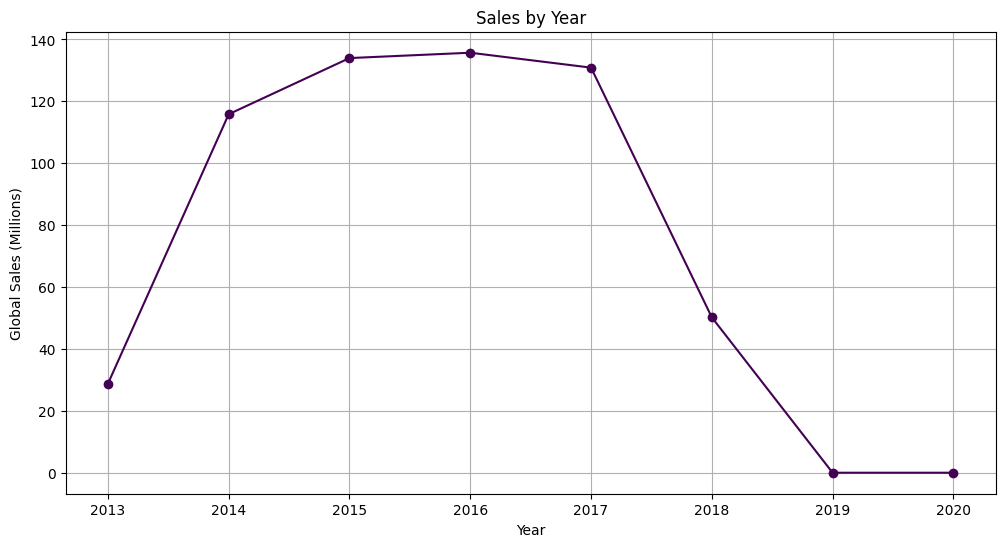

In [ ]:
# Sales by year
year_sales = df.groupby("Year")["Global"].sum()
plt.figure(figsize=(12, 6))
year_sales.plot(kind="line", marker="o", color=plt.cm.viridis.colors)
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")  # Updated label
plt.title("Sales by Year")
plt.grid(True)
plt.show()

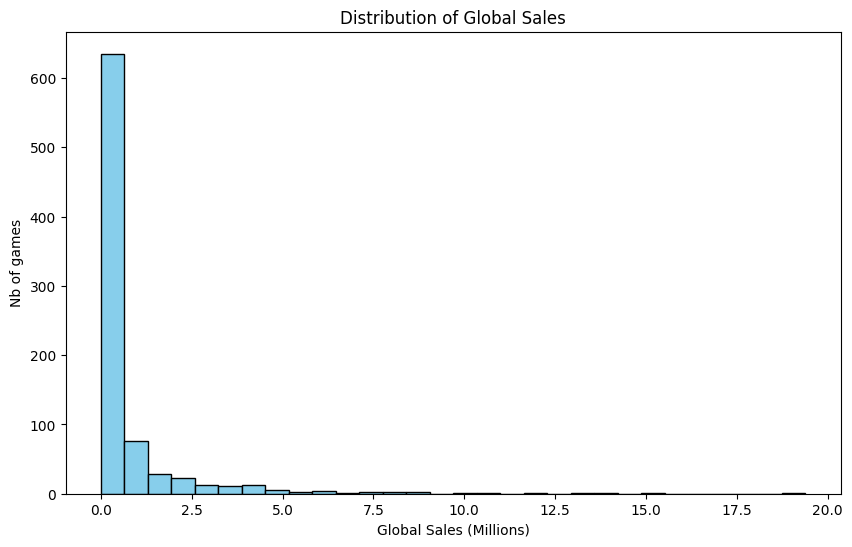

In [ ]:
# Distribution Plot for Global Sales
plt.figure(figsize=(10, 6))
plt.hist(df['Global'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (Millions)')  # Updated label
plt.ylabel('Nb of games')
plt.show()


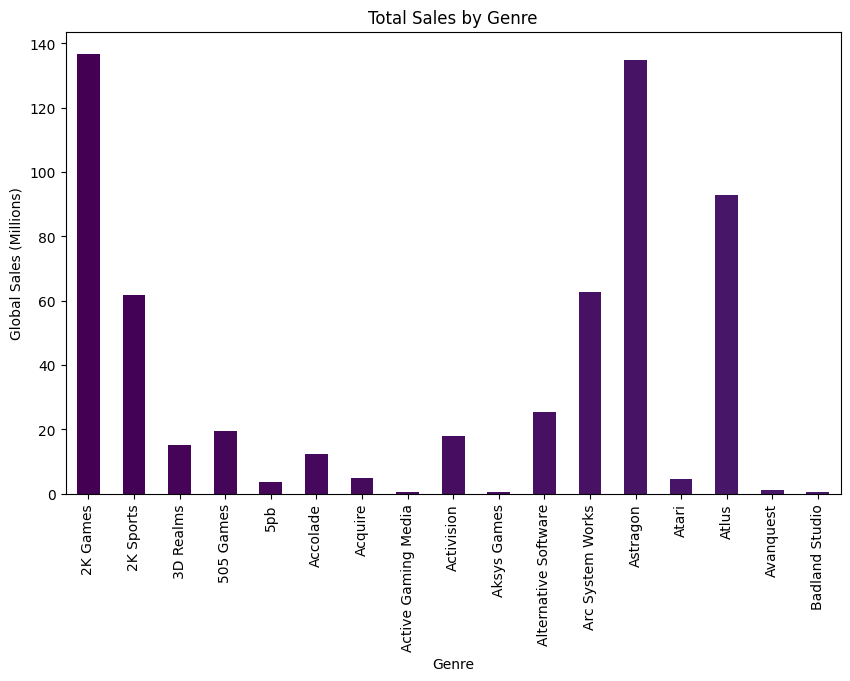

In [ ]:
# Total sales by genre
genre_sales = df.groupby("Genre")["Global"].sum()
plt.figure(figsize=(10, 6))
genre_sales.plot(kind="bar", color=plt.cm.viridis.colors)
plt.xlabel("Genre")
plt.ylabel("Global Sales (Millions)")
plt.title("Total Sales by Genre")
plt.show()

<ipython-input-32-d7c9bce377d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='viridis')


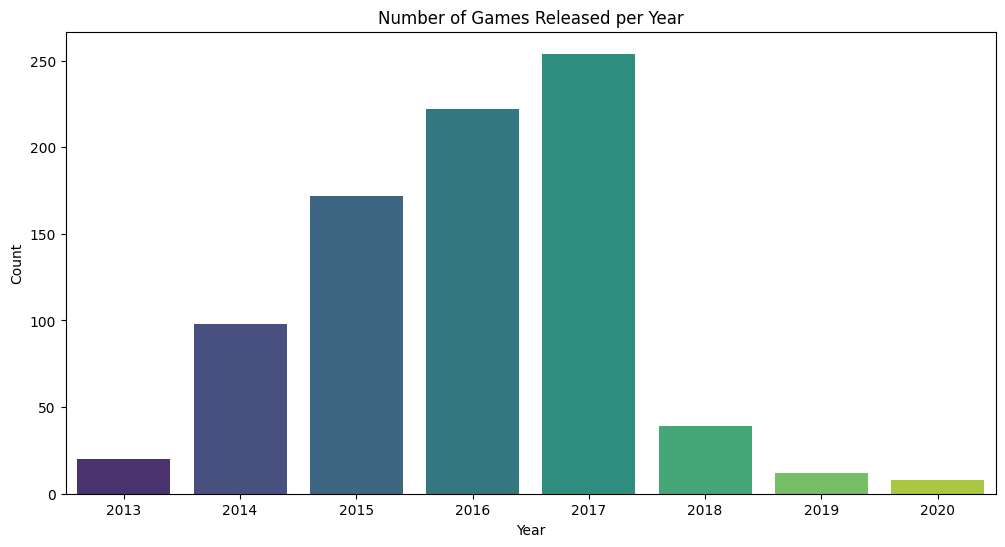

In [ ]:
# Example: Count of games per year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()